In [7]:
# ==========================================
# customer_data clusterring radar chart
# ==========================================
# - 顧客クラスタリング レーダーチャート分析
# ------------------------------------------
# Author : kokoyugura
# Date   : 2025-11
# Env    : Python 3.10+, openpyxl, pandas
# ==========================================

In [8]:
# === ライブラリ ===
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Meiryo'
plt.rcParams['axes.unicode_minus'] = False
import numpy as np
from pathlib import Path

In [9]:
# === 設定 ===
ROOT = Path.cwd()
DATA_PATH = ROOT / "output" / "rfm_cluster_result.xlsx"

#以下、公開用のためコメントアウト
#print("参照データ：", DATA_PATH)
print("参照データ：customer_data.csv")

参照データ：customer_data.csv


In [10]:
# === データ読み込み ===
rfm = pd.read_excel(DATA_PATH)

# === クラスタごとの平均値 ===
cluster_summary = (
    rfm.groupby("Cluster")[["Recency", "Frequency", "Monetary"]]
    .mean()
    .round(1)
)

print("✅ クラスタ別RFM平均値")
print(cluster_summary)

✅ クラスタ別RFM平均値
         Recency  Frequency  Monetary
Cluster                              
0            8.8       22.8   16979.6
1           38.7       22.2   15723.2
2           10.4       22.8   13809.8
3            8.3       30.7   15349.8


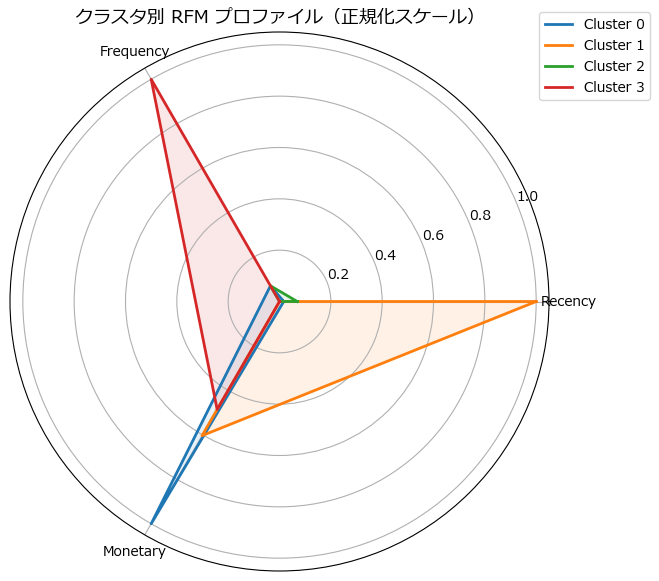

In [11]:
# === レーダーチャート用に正規化（0～1スケール） ===
normalized = (cluster_summary - cluster_summary.min()) / (cluster_summary.max() - cluster_summary.min())

# === レーダーチャート描画 ===
labels = list(normalized.columns)
num_vars = len(labels)

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # 最初の点に戻る

# === プロット設定 ===
plt.figure(figsize=(7, 7))
for i, (idx, row) in enumerate(normalized.iterrows()):
    values = row.tolist()
    values += values[:1]
    plt.polar(angles, values, label=f"Cluster {idx}", linewidth=2)
    plt.fill(angles, values, alpha=0.1)

plt.xticks(angles[:-1], labels)
plt.title("クラスタ別 RFM プロファイル（正規化スケール）", size=13)
plt.legend(loc="upper right", bbox_to_anchor=(1.2, 1.05))
plt.show()